# 1. Численная интерполяция

Построить численную интерполяцию функции $ y = f(x) $ на отрезке $ x \in [a, b] $, в точках $ x^{\ast} \in [a, b] $ не совпадающих с узлами
интерполяции, используя [интерполяционный полином Лагранжа](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%87%D0%BB%D0%B5%D0%BD_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0#%D0%9E%D0%B1%D1%89%D0%B8%D0%B9_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9) (см. Определение, Общий случай). В качестве $ x^{\ast} $ выбрать середины отрезков между интерполяционными
узлами.


1. Выполнить в случае сетки с равномерным шагом $ x_{i+1} = x_{i} + h $, $ h = \frac{b - a}{N} $, где $ N $ --- количество узлов сетки.

* Построить графики для значений $ N $: 5, 10, 50, 100

2. В качестве сетки, на которой задана функция, использовать [узлы Чебышева](https://ru.wikipedia.org/wiki/%D0%A3%D0%B7%D0%BB%D1%8B_%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2%D0%B0)

* Построить графики для значений $ N $: 5, 10, 50, 100. Сравнить со случаем равномерной сетки.

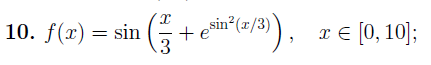

Введите количество узлов сетки: 5


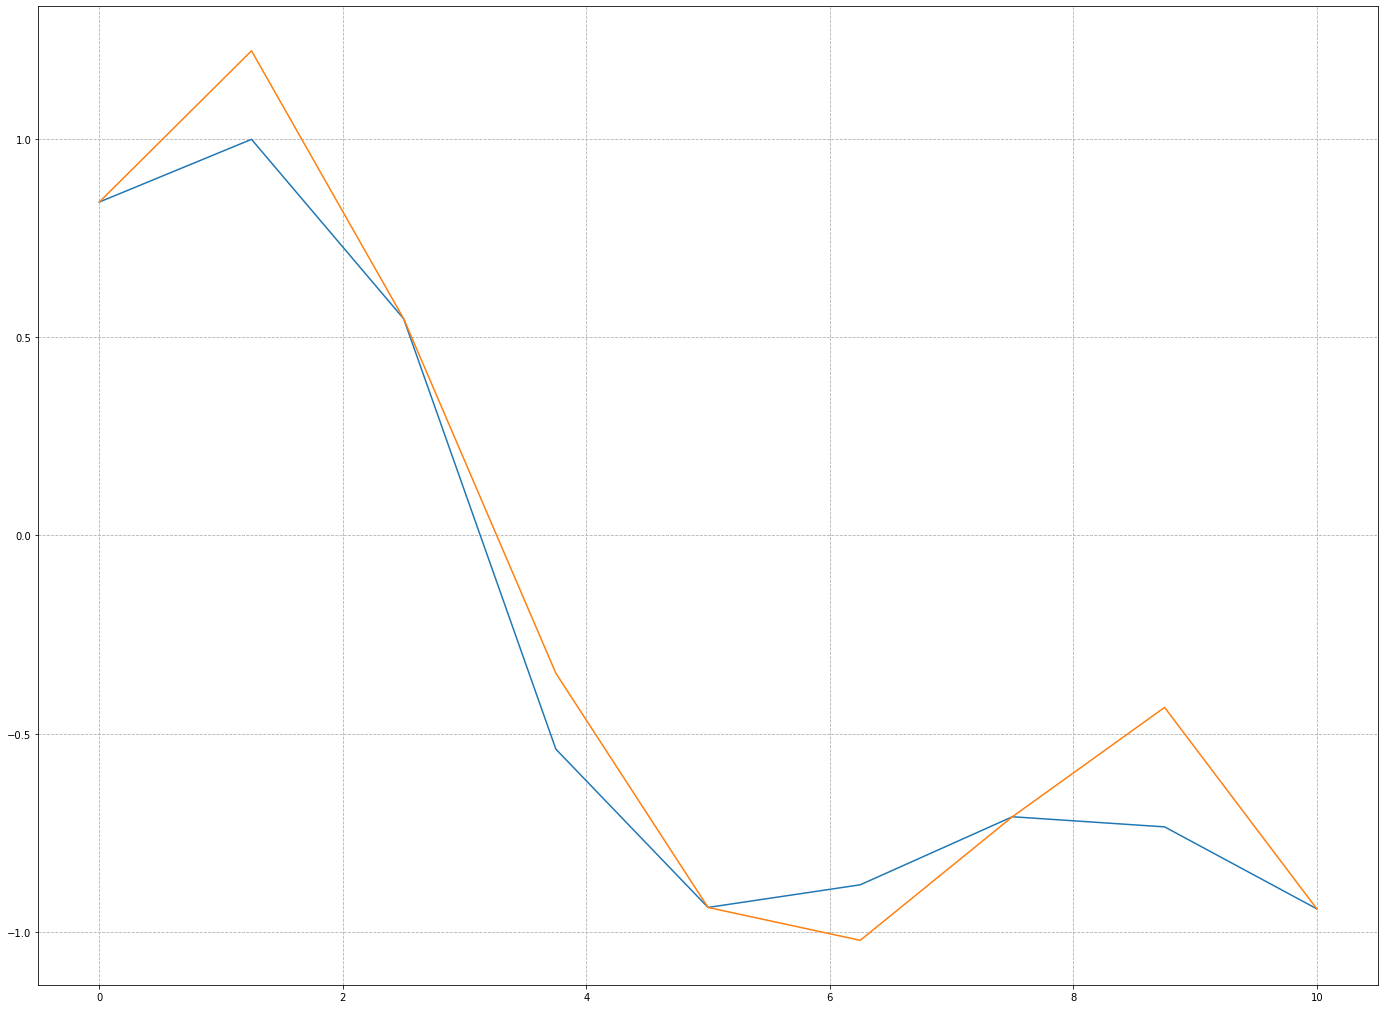

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Pol_Lagr(N, x_i, x, i):
    l = 1
    for j in range(N):
        if j != i:
          l = l * (x - x_i[2*j])/(x_i[2*i] - x_i[2*j])
    return l

N = int(input('Введите количество узлов сетки: '))
a = 0
b = 10
# x_i и y_i - узлы интерполяции
x_i = np.linspace(a, b, 2*N - 1)
y_i = np.sin(x_i/3 + np.exp((np.sin(x_i/3))**2))

y_l = []
for x in x_i:
    f = 0
    for i in range(N):
        f += y_i[2*i] * Pol_Lagr(N, x_i, x, i)
    y_l.append(f)

plt.rcParams ['figure.figsize'] = [24, 18]

plt.plot(x_i, y_i)
plt.plot(x_i, y_l)
plt.grid(visible = True, linestyle='--')
plt.show()


Введите количество узлов сетки: 150


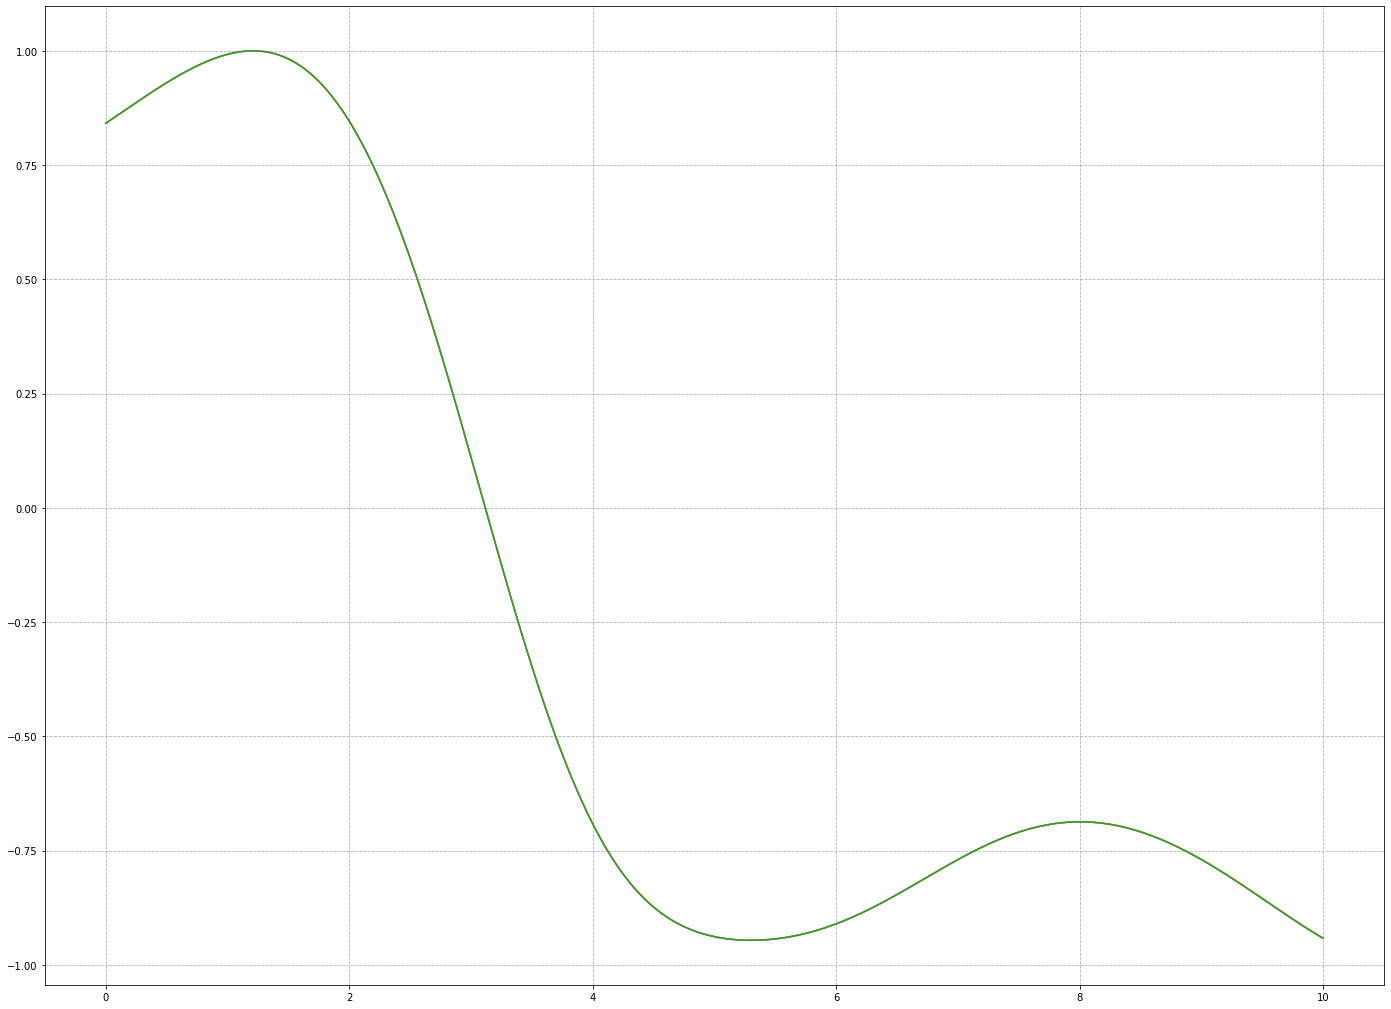

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def Pol_Lagr(N, x_i, x, i):
    l = 1
    for j in range(N):
        if j != i:
            l *= (x - x_i[j]) / (x_i[i] - x_i[j])
    return l


N = int(input('Введите количество узлов сетки: '))
a = 0
b = 10
# x_i и y_i - узлы интерполяции
x_cheb = []
for k in range(N):
    x_k = (a + b)/2 + (a-b)/2 * np.cos((2*(k+1)-1) * np.pi / (2*N))
    x_cheb.append(x_k)
x_cheb = np.array(x_cheb)

y_i = np.sin(x_cheb/3 + np.exp((np.sin(x_cheb/3))**2))
y_l = []
for x in x_cheb:
    y = 0
    for i in range(N):
        y += y_i[i] * Pol_Lagr(N, x_cheb, x, i)
    y_l.append(y)

plt.rcParams ['figure.figsize'] = [24, 18]

x_i = np.linspace(a, b, 2000)
y_i = np.sin(x_i/3 + np.exp((np.sin(x_i/3))**2))
plt.plot(x_i, y_i)

plt.plot(x_cheb, y_l)

x_i = np.linspace(a, b, N)
y_i = np.sin(x_i/3 + np.exp((np.sin(x_i/3))**2))
plt.plot(x_i, y_i)

plt.grid(visible = True, linestyle='--')
plt.show()